## LOADING DATASET AND INITIALIZATION

In [32]:
pip install "numpy<2" --force-reinstall

python(6304) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl (13.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.16.2 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
streamlit 1.37.1 requires packaging<25,>=20, but you have packaging 25.0 which is incompatible.
streamlit 1.37.1 requires pillow<11,>=7.1.0, but you have pillow 12.0.0 which is incompatible.
Note: you may need to rest

In [33]:
import os
print(os.getcwd())

/Users/atharvashrikant/Intel-Recs/Intelligence-Sig-Recs-2025


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [35]:
train = pd.read_csv("/Users/atharvashrikant/Downloads/archive (6)/train_data.csv")
test = pd.read_csv("/Users/atharvashrikant/Downloads/archive (6)/test_data.csv")


## Exploratory Data Analysis

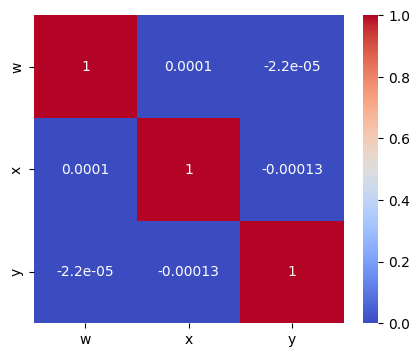

In [36]:
corr = train.corr()
plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

can say that y has no direct relation with x or w

In [37]:
train.head()

,w,x,y
0,-2.5,-2.784390,0.596025
1,-2.5,-2.308732,-0.449801
2,-2.5,-3.869936,-0.301154
3,-2.5,-2.671678,0.399640
4,-2.5,6.609344,0.700448


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000000 entries, 0 to 99999999
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   w       float64
 1   x       float64
 2   y       float64
dtypes: float64(3)
memory usage: 2.2 GB


In [39]:
train.describe

<bound method NDFrame.describe of             w         x         y
0        -2.5 -2.784390  0.596025
1        -2.5 -2.308732 -0.449801
2        -2.5 -3.869936 -0.301154
3        -2.5 -2.671678  0.399640
4        -2.5  6.609344  0.700448
...       ...       ...       ...
99999995  2.5  6.869769 -0.962586
99999996  2.5 -8.823615  0.148889
99999997  2.5  4.650802 -0.776686
99999998  2.5 -1.089568 -0.438802
99999999  2.5 -1.961255  1.092455

[100000000 rows x 3 columns]>

In [9]:
train.isnull().sum()

w    0
x    0
y    0
dtype: int64

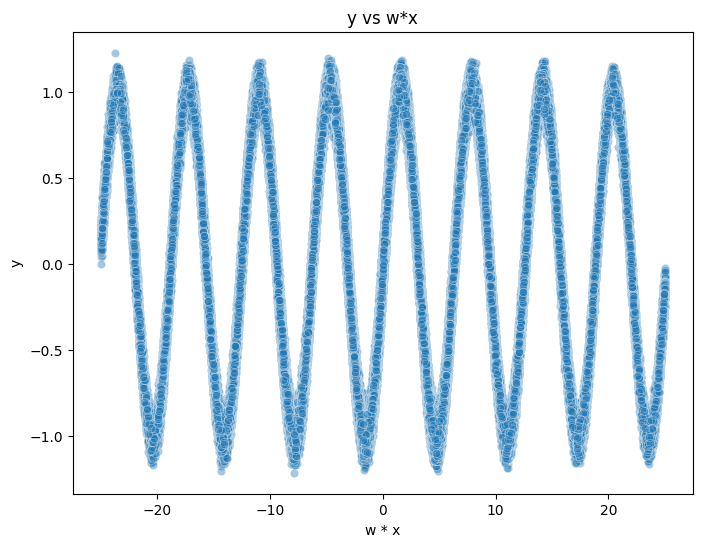

In [40]:
train_sample = train.sample(1000000, random_state=42)
plt.figure(figsize = (8,6))
train_sample['wx'] = train_sample['x']*train_sample['w']
sns.scatterplot(data = train_sample, x = 'wx', y = 'y', alpha =0.4)
plt.title("y vs w*x")
plt.xlabel("w * x")
plt.ylabel("y")
plt.show()


THIS REPRESENTS A SINOSUDIAL WAVE, FROM THE GRAPH WE CAN SEE THE Y AXIS EXTENDS BEYOND [-1,1], SO WE FIND OUT THE MAX AND MIN VALUE OF Y

In [41]:
print(f'Max value of y : {train['y'].max()}')
print(f'Min value of y : {train['y'].min()}')


Max value of y : 1.2592823435849096
Min value of y : -1.2498299052112347


In [42]:
avg = (train['y'].max() + abs(train['y'].min())) /2
print(f'{avg:.2f}')

1.25


## VISUALIZARION

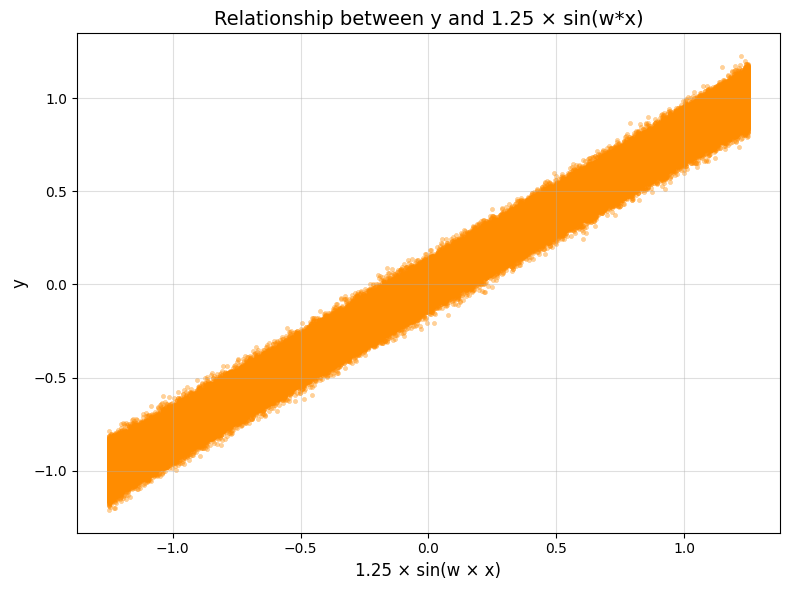

In [43]:
train_sample['sin_wx'] = 1.25 * np.sin(train_sample['w'] * train_sample['x'])

plt.figure(figsize=(8,6))
sns.scatterplot(data=train_sample,x='sin_wx', y='y',alpha=0.4, s=10,color='darkorange', edgecolor=None)
plt.title("Relationship between y and 1.25 × sin(w*x)", fontsize=14)
plt.xlabel("1.25 × sin(w × x)", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()



In [47]:

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


x = train_sample['sin_wx']
y = train_sample['y']

X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)


model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)


model.fit(X_train, y_train)


y_pred = model.predict(X_valid)


rmse = mean_squared_error(y_valid, y_pred)
print(f"Validation RMSE: {rmse:.4f}")


Validation RMSE: 0.0025


In [48]:
from sklearn.metrics import r2_score
print(f"R²: {r2_score(y_valid, y_pred):.4f}")

R²: 0.9950


/var/folders/px/wb7wt0js40zcp_6pklm1g2r00000gn/T/ipykernel_3148/3725441247.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


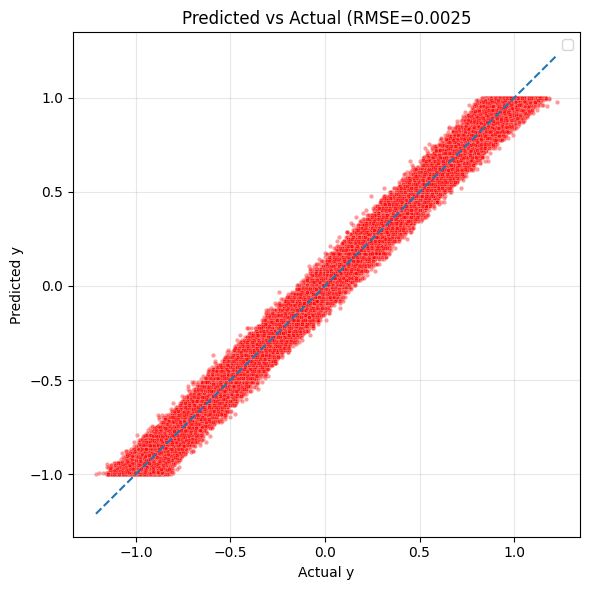

In [49]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_valid, y=y_pred, alpha=0.4, s=10, color='red')
plt.plot([y_valid.min(), y_valid.max()],
         [y_valid.min(), y_valid.max()],
         '--')
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title(f"Predicted vs Actual (RMSE={rmse:.4f}")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [18]:
import torch
import torch.nn as nn
import torch.autograd as autograd

z = torch.tensor(
    (train_sample['w'] * train_sample['x']).to_numpy(),
    dtype=torch.float32,
    requires_grad=True
).unsqueeze(1)# to add an extra dimension 1

y = torch.tensor(train_sample['y'].to_numpy(), dtype=torch.float32).unsqueeze(1)

class PINN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 64), nn.Tanh(),
            nn.Linear(64, 64), nn.Tanh(),
            nn.Linear(64, 1)
        )

    def forward(self, z):
        return self.net(z)

model = PINN()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

for epoch in range(50):
    optimizer.zero_grad()
    y_pred = model(z)

    # compute derivatives
    dy_dz = autograd.grad(y_pred, z, torch.ones_like(y_pred), create_graph=True)[0]
    d2y_dz2 = autograd.grad(dy_dz, z, torch.ones_like(dy_dz), create_graph=True)[0]
    f = d2y_dz2 + y_pred

    # losses
    data_loss = torch.mean((y_pred - y)**2)
    physics_loss = torch.mean(f**2)
    loss = data_loss + physics_loss

    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch:4d} | Total: {loss.item():.6f} | Data: {data_loss.item():.6f} | Phys: {physics_loss.item():.6f}")





Epoch    0 | Total: 0.710649 | Data: 0.609918 | Phys: 0.100731
Epoch   10 | Total: 0.502863 | Data: 0.492341 | Phys: 0.010522
Epoch   20 | Total: 0.484540 | Data: 0.471981 | Phys: 0.012559
Epoch   30 | Total: 0.464634 | Data: 0.458097 | Phys: 0.006536
Epoch   40 | Total: 0.458039 | Data: 0.449142 | Phys: 0.008897


Model is learning well, total loss and physics loss are both dropping steadily, showing the network is fitting data while satisfying the sine-wave equation